
---

# **Análise dos Filmes de Drama na Netflix e Rotten Tomatoes**
Autores: **Rony Ken Nagai (RM: 551549)** e **Tomáz Versolato Carballo (RM: 551417)**

---

## **Introdução**

Este projeto visa realizar uma análise detalhada de filmes do gênero **Drama** disponíveis na plataforma **Netflix**, comparando suas avaliações com as críticas registradas no **Rotten Tomatoes**. A análise foca em identificar padrões e relações entre as avaliações do público e da crítica, além de explorar subgêneros dentro de Drama e suas popularidades ao longo do tempo.

Nesta análise, realizamos a combinação de dois datasets distintos (Netflix e Rotten Tomatoes) para uma visão abrangente, realizamos diversas visualizações e aplicamos testes estatísticos, como a **Regressão Linear** e o **Teste t**, para validar nossas hipóteses.

Nosso objetivo é fornecer insights claros sobre como o público e a crítica avaliam os filmes de Drama e quais características podem influenciar essas avaliações.

---

## **Carregamento e Preparação dos Dados**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [ ]:
# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

In [ ]:
# Carregando os datasets
netflix_data = pd.read_csv('/content/netflix_titles.csv')
rt_data = pd.read_csv('/content/rotten_tomatoes_movies.csv')

# Exibindo as primeiras linhas de cada dataset para verificação
print("Netflix Dataset")
display(netflix_data.head())
print("Rotten Tomatoes Dataset")
display(rt_data.head())


Netflix Dataset


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Rotten Tomatoes Dataset


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


### **Explicação**
Aqui realizamos o carregamento dos dois datasets principais, o **Netflix Titles**, que contém informações sobre os títulos disponíveis na plataforma, e o **Rotten Tomatoes Movies**, que possui avaliações da crítica e do público. Também aplicamos uma visualização inicial para garantir que os dados foram carregados corretamente.

---


## **Tratamento de Dados**

In [ ]:
# Limpando os dados: substituímos valores NaN por strings vazias na coluna 'genres' do Rotten Tomatoes
rt_data['genres'] = rt_data['genres'].fillna('')

# Filtrando apenas os filmes de Drama nos dois datasets
rt_dramas = rt_data[rt_data['genres'].str.contains('drama', case=False)]
netflix_dramas = netflix_data[netflix_data['listed_in'].str.contains('Dramas', case=False)]

# Criando uma chave composta no dataset da Netflix para facilitar a combinação posterior
netflix_data['release_year'] = pd.to_datetime(netflix_data['date_added'], errors='coerce').dt.year
netflix_data['key'] = netflix_data['title'].str.lower() + '-' + netflix_data['release_year'].astype(str)

# Criando a chave composta no dataset do Rotten Tomatoes
rt_data['original_release_year'] = pd.to_datetime(rt_data['original_release_date'], errors='coerce').dt.year.astype(str)
rt_data['key'] = rt_data['movie_title'].str.lower() + '-' + rt_data['original_release_year']

### **Explicação**
Aqui filtramos os filmes de **Drama** de ambos os datasets e criamos uma **chave composta** baseada no título e no ano de lançamento dos filmes. Essa chave será usada para combinar os dados da Netflix com o Rotten Tomatoes.

---


## **Combinação dos Datasets**

In [ ]:
# Combinando os datasets utilizando a chave composta
dramas_combinados = pd.merge(netflix_dramas, rt_dramas, on='key', how='inner')

# Verificando o resultado da combinação
print(dramas_combinados.shape)
print(dramas_combinados.head())


(99, 36)
  show_id   type          title         director  \
0   s1798  Movie     I Am Woman       Unjoo Moon   
1   s1812  Movie  Yes, God, Yes      Karen Maine   
2   s1922  Movie    The Outpost        Rod Lurie   
3   s2172  Movie    Almost Love       Mike Doyle   
4   s2284  Movie           Only  Takashi Doscher   

                                                cast                  country  \
0  Tilda Cobham-Hervey, Danielle Macdonald, Evan ...                Australia   
1  Natalia Dyer, Timothy Simons, Wolfgang Novogra...            United States   
2  Scott Eastwood, Caleb Landry Jones, Orlando Bl...  United States, Bulgaria   
3  Scott Evans, Augustus Prew, Kate Walsh, Michel...            United States   
4  Freida Pinto, Leslie Odom Jr., Chandler Riggs,...            United States   

         date_added  release_year rating duration  ... tomatometer_status  \
0  October 24, 2020        2020.0  TV-MA  117 min  ...              Fresh   
1  October 22, 2020        2020.0    

### **Explicação**
Agora combinamos os dois datasets com base na chave composta criada anteriormente. O objetivo dessa junção é realizar análises comparativas entre as avaliações dos filmes de Drama da Netflix e as críticas do Rotten Tomatoes.

---

## **Exploração dos Dados**

In [ ]:
# Exibindo as estatísticas descritivas do dataset combinado
desc_stats = dramas_combinados.describe()
display(desc_stats)

# Verificando os tipos de dados das colunas mais relevantes
print(dramas_combinados[['tomatometer_rating', 'audience_rating', 'duration']].dtypes)

# Convertendo as colunas de avaliação e duração para numérico, se necessário
dramas_combinados['tomatometer_rating'] = pd.to_numeric(dramas_combinados['tomatometer_rating'], errors='coerce')
dramas_combinados['audience_rating'] = pd.to_numeric(dramas_combinados['audience_rating'], errors='coerce')

# Limpando a coluna de duração (removendo 'min') e convertendo para número
dramas_combinados['duration'] = dramas_combinados['duration'].str.extract('(\d+)').astype(float)

,release_year,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,99.000000,95.000000,98.000000,98.000000,98.000000,98.000000,99.000000,99.000000,99.000000
mean,2018.030303,108.305263,65.734694,71.704082,60.295918,1341.183673,15.202020,55.080808,15.949495
std,1.207583,19.307188,28.476994,84.600847,18.236821,2098.112806,13.527734,78.564763,18.321602
min,2015.000000,73.000000,0.000000,5.000000,13.000000,10.000000,0.000000,0.000000,0.000000
25%,2017.000000,95.000000,44.000000,16.000000,47.000000,165.000000,5.000000,7.000000,4.000000
50%,2018.000000,105.000000,72.000000,41.000000,61.500000,493.500000,12.000000,23.000000,9.000000
75%,2019.000000,119.000000,91.000000,98.000000,74.750000,1444.750000,22.500000,73.000000,20.500000
max,2020.000000,209.000000,100.000000,439.000000,91.000000,11699.000000,56.000000,421.000000,99.000000


tomatometer_rating    float64
audience_rating       float64
duration               object
dtype: object


### **Explicação**
Aqui realizamos uma análise exploratória inicial dos dados combinados e garantimos que as colunas de avaliação (do público e da crítica) e duração estejam corretamente formatadas para que possam ser utilizadas nas próximas análises.

---

---

### **Verificação e Tratamento de Valores Nulos**

Antes de avançar para a criação dos gráficos e análise dos dados, é fundamental garantir que não haja **valores nulos** nas colunas de interesse. Valores nulos podem comprometer a integridade da análise e distorcer os resultados. Por isso, vamos proceder com a verificação e remoção desses valores.

#### 1. **Verificação de valores nulos nas colunas relevantes**

Primeiro, verificamos se há **valores nulos** nas colunas que serão usadas para os gráficos: `'tomatometer_rating'`, `'audience_rating'` e `'duration'`.

```python
# Verificar se há valores nulos
print(dramas_combinados[['tomatometer_rating', 'audience_rating', 'duration']].isnull().sum())
```

##### **Explicação**:
- Este comando nos mostra a quantidade de valores nulos presentes em cada uma dessas colunas. Se houver valores nulos, eles precisarão ser tratados antes de qualquer visualização ou análise.

---

#### 2. **Remoção de valores nulos**

Após identificar a presença de valores nulos, removemos as linhas que contêm esses valores para garantir que apenas dados completos sejam usados na análise.

```python
# Remover os valores nulos antes de criar os gráficos
dramas_combinados = dramas_combinados.dropna(subset=['tomatometer_rating', 'audience_rating', 'duration'])
```

##### **Explicação**:
- Utilizamos o método **`dropna()`** para remover todas as linhas que tenham valores nulos nas colunas de interesse. Isso é essencial para evitar problemas nos cálculos e visualizações, uma vez que bibliotecas como Seaborn e Matplotlib não lidam bem com valores ausentes.
- O parâmetro **`subset`** define as colunas específicas nas quais estamos verificando a presença de nulos, garantindo que apenas as linhas que têm dados completos para `'tomatometer_rating'`, `'audience_rating'` e `'duration'` permaneçam no conjunto de dados.

---

#### 3. **Verificação dos tipos de dados**

Após a remoção de valores nulos, verificamos os tipos de dados de todas as colunas do DataFrame para garantir que não haja inconsistências e para identificar as colunas que não são numéricas.

```python
# Exibir os tipos de dados de todas as colunas para identificar as não numéricas
print(dramas_combinados.dtypes)
```

##### **Explicação**:
- Este comando lista os **tipos de dados** de cada coluna no DataFrame. É importante garantir que as colunas que desejamos usar para análises quantitativas (como `'tomatometer_rating'`, `'audience_rating'` e `'duration'`) sejam do tipo **numérico**.
- Se uma coluna que deveria ser numérica estiver como **string**, isso pode causar erros nos gráficos e análises estatísticas, e precisaríamos convertê-la corretamente.

---

#### 4. **Seleção de colunas numéricas**

Agora, selecionamos apenas as colunas numéricas do DataFrame para análise mais aprofundada e para garantir que as operações numéricas e os gráficos sejam construídos corretamente.

```python
# Selecionar apenas colunas numéricas
colunas_num = dramas_combinados.select_dtypes(include=[np.number])
```

##### **Explicação**:
- Utilizamos o método **`select_dtypes()`** com o argumento **`include=[np.number]`** para selecionar apenas as colunas que têm tipos de dados numéricos. Isso é útil para garantir que estamos lidando apenas com dados quantitativos para gráficos, correlações e outros cálculos.

---

#### 5. **Visualização das colunas numéricas**

Finalmente, visualizamos as primeiras linhas das colunas numéricas selecionadas para confirmar que a seleção foi feita corretamente e para ter uma prévia dos dados com os quais vamos trabalhar.

```python
# Verificar as colunas numéricas selecionadas
print(colunas_num.head())
```

##### **Explicação**:
- Exibimos as primeiras linhas das colunas numéricas para garantir que os dados estão no formato correto para análises. Isso também nos dá uma visão geral das variáveis que iremos explorar nos próximos gráficos e cálculos.

In [ ]:
# Verificar se há valores nulos
print(dramas_combinados[['tomatometer_rating', 'audience_rating', 'duration']].isnull().sum())

# Remover os valores nulos antes de criar os gráficos
dramas_combinados = dramas_combinados.dropna(subset=['tomatometer_rating', 'audience_rating', 'duration'])

# Exibir os tipos de dados de todas as colunas para identificar as não numéricas
print(dramas_combinados.dtypes)

# Selecionar apenas colunas numéricas
colunas_num = dramas_combinados.select_dtypes(include=[np.number])

# Verificar as colunas numéricas selecionadas
print(colunas_num.head())


tomatometer_rating    0
audience_rating       0
duration              0
dtype: int64
show_id                              object
type                                 object
title                                object
director                             object
cast                                 object
country                              object
date_added                           object
release_year                          int64
rating                               object
duration                            float64
listed_in                            object
description                          object
key                                  object
rotten_tomatoes_link                 object
movie_title                          object
movie_info                           object
critics_consensus                    object
content_rating                       object
genres                               object
directors                            object
authors                            

### **Concluindo**

Este processo garante que os dados utilizados nas análises estejam completos (sem valores nulos) e devidamente preparados para cálculos e visualizações. Ao remover valores nulos e selecionar apenas as colunas numéricas, nos asseguramos de que qualquer operação ou gráfico que criarmos estará baseado em dados confiáveis e corretos.

---

## **Visualização de Relações Entre Variáveis**

### **Pairplot: Exploração das Relações entre Avaliações e Duração**

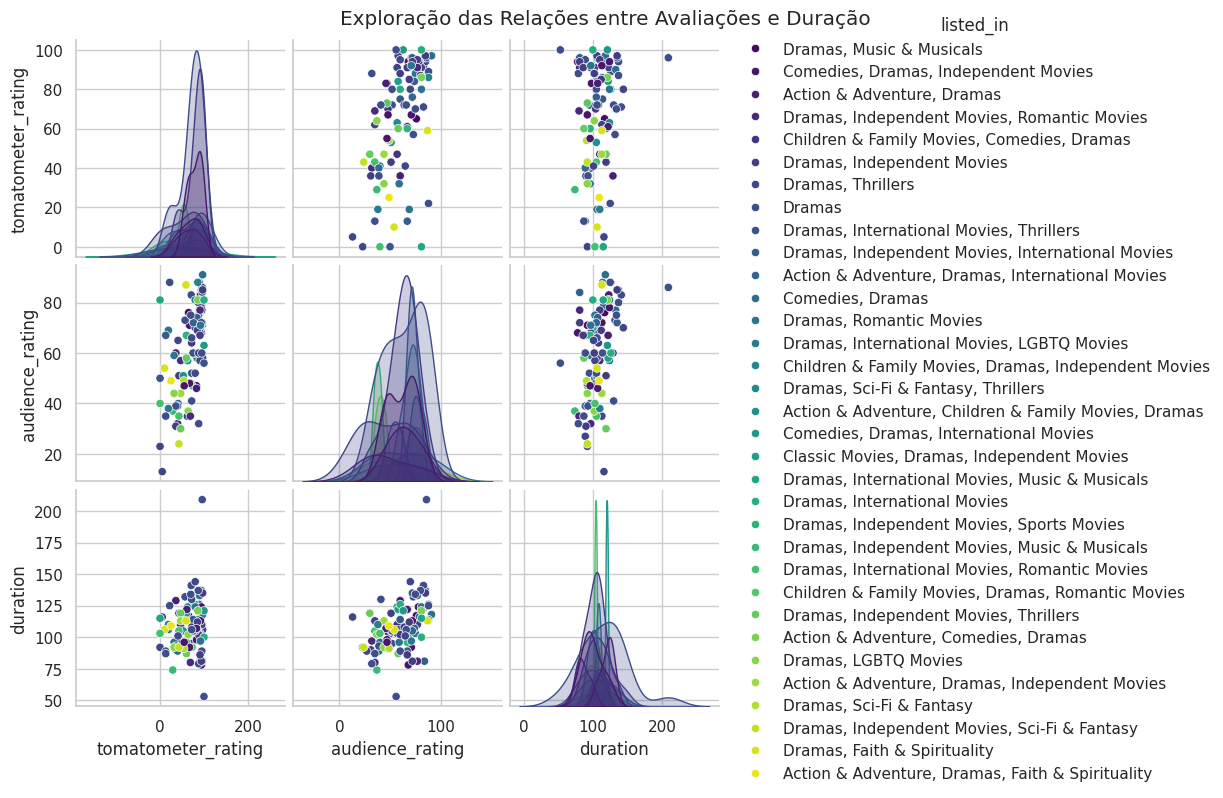

In [ ]:
# Recriar o pairplot
sns.pairplot(dramas_combinados, vars=['tomatometer_rating', 'audience_rating', 'duration'], hue='listed_in', palette='viridis')
plt.suptitle('Exploração das Relações entre Avaliações e Duração', y=1.02)
plt.show()


### **Explicação**
O **pairplot** permite explorar as possíveis correlações visuais entre as variáveis: avaliação da crítica, avaliação do público e duração dos filmes. Além disso, ele é colorido por **subgênero**.

---

## **Correlação Entre as Variáveis**

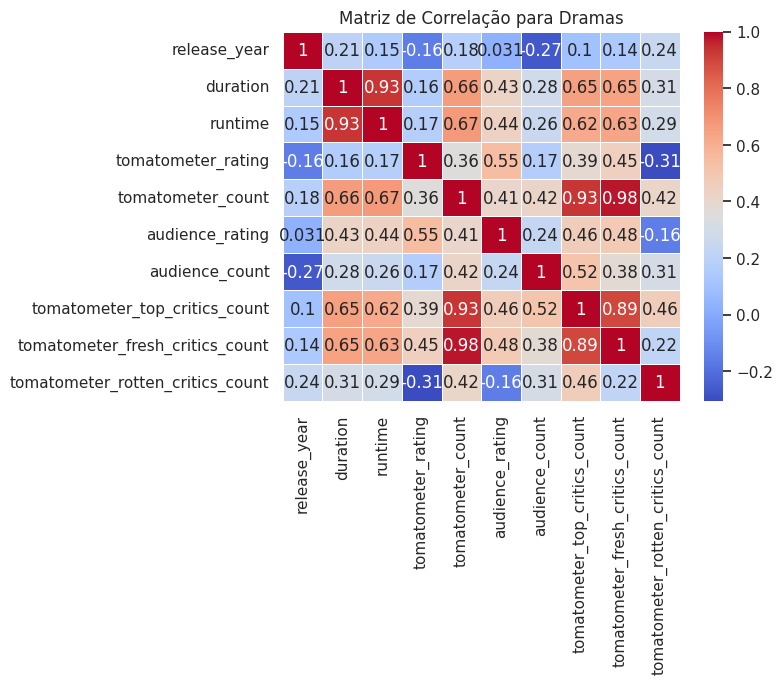

In [ ]:
# Selecionar apenas colunas numéricas
colunas_num = dramas_combinados.select_dtypes(include=[np.number])

# Recriar o heatmap de correlação com colunas numéricas
corr_matrix = colunas_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação para Dramas')
plt.show()


### **Explicação**
A **matriz de correlação** exibe o grau de relação linear entre as variáveis. Utilizamos um heatmap para visualizar as correlações e entender melhor as interações entre avaliação crítica, avaliação do público e duração dos filmes.

---

## **Análise de Subgêneros de Drama**

<ipython-input-77-79696937fcd1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subgenre', y='tomatometer_rating', data=dramas_combinados, palette='Set3')


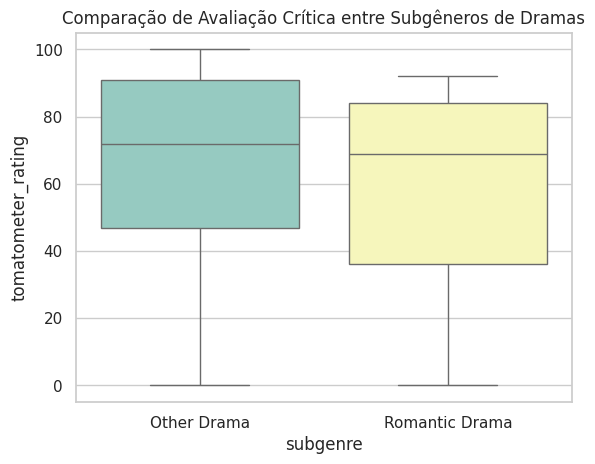

<ipython-input-77-79696937fcd1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='subgenre', y='audience_rating', data=dramas_combinados, palette='Set3')


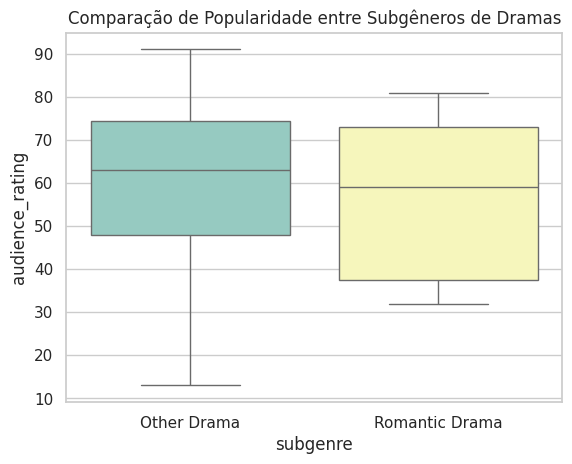

In [ ]:
# Criando uma nova coluna para identificar subgêneros
dramas_combinados['subgenre'] = np.where(dramas_combinados['listed_in'].str.contains('romantic', case=False), 'Romantic Drama',
                         np.where(dramas_combinados['listed_in'].str.contains('crime', case=False), 'Crime Drama', 'Other Drama'))

# Visualização das diferenças entre os subgêneros
sns.boxplot(x='subgenre', y='tomatometer_rating', data=dramas_combinados, palette='Set3')
plt.title('Comparação de Avaliação Crítica entre Subgêneros de Dramas')
plt.show()

sns.boxplot(x='subgenre', y='audience_rating', data=dramas_combinados, palette='Set3')
plt.title('Comparação de Popularidade entre Subgêneros de Dramas')
plt.show()


### **Explicação**
Utilizamos **boxplots** para visualizar a distribuição das avaliações da crítica e do público dentro de diferentes **subgêneros** de Drama (Romance, Crime, e outros).

---

### **Correlação e Regressão Linear**



Correlação entre Duração e Avaliação Crítica: 0.16084530921362883
Correlação entre Duração e Avaliação do Público: 0.42846269270727383


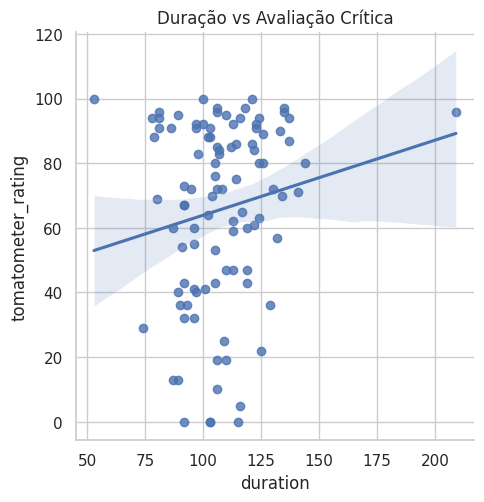

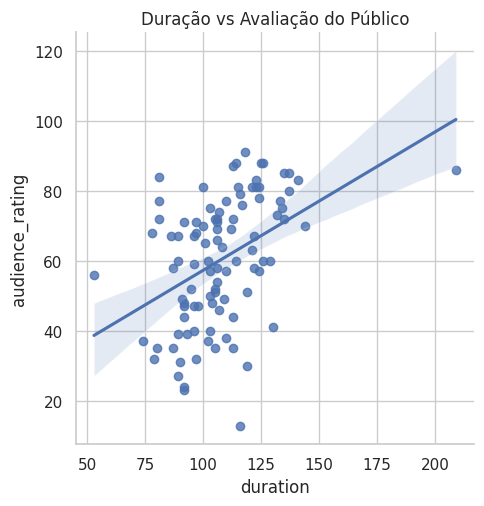

In [ ]:
# Análise de correlação entre duração e avaliações
correlacao_duracao_critica = dramas_combinados[['duration', 'tomatometer_rating']].corr().iloc[0,1]
correlacao_duracao_audiencia = dramas_combinados[['duration', 'audience_rating']].corr().iloc[0,1]
print(f"Correlação entre Duração e Avaliação Crítica: {correlacao_duracao_critica}")
print(f"Correlação entre Duração e Avaliação do Público: {correlacao_duracao_audiencia}")

# Visualizando as correlações
sns.lmplot(x='duration', y='tomatometer_rating', data=dramas_combinados)
plt.title('Duração vs Avaliação Crítica')
plt.show()

sns.lmplot(x='duration', y='audience_rating', data=dramas_combinados)
plt.title('Duração vs Avaliação do Público')
plt.show()


### **Explicação**
Os gráficos de **regressão linear** mostram as tendências entre a duração dos filmes e suas avaliações. A inclinação da linha de regressão indica se há uma relação positiva ou negativa entre essas variáveis. Os coeficientes de correlação fornecem uma medida quantitativa da força dessa relação.

---

## **Análise de Filmes Premiados: Teste t**

Nesta seção, vamos realizar um **teste t** para comparar as avaliações críticas entre filmes premiados e não premiados. O objetivo é verificar se há uma diferença estatisticamente significativa nas avaliações críticas entre esses dois grupos.

#### Passos:

1. **Criação de uma variável dummy**:
   Criamos uma nova coluna chamada `'awarded'`, que atribui o valor 1 aos filmes cujos títulos contêm as palavras **"award"** ou **"oscar"** (indicando que eles são premiados), e o valor 0 para os outros filmes.

2. **Remoção de valores nulos**:
   Removemos quaisquer valores nulos da coluna `'tomatometer_rating'` para garantir que estamos trabalhando apenas com avaliações válidas.

3. **Separação dos grupos**:
   Separamos os filmes premiados dos não premiados com base na coluna `'awarded'`, armazenando suas respectivas avaliações críticas em variáveis separadas.

4. **Tratamento de variação insuficiente**:
   Verificamos se os filmes em cada grupo (premiados e não premiados) têm variação suficiente em suas avaliações críticas. Se todos os filmes em um grupo têm a mesma avaliação, adicionamos uma pequena variação para garantir que o teste possa ser realizado.

5. **Execução do Teste t**:
   Finalmente, aplicamos o **Teste t** para comparar as avaliações críticas entre os dois grupos e verificamos se a diferença é estatisticamente significativa com base no valor de p.

In [ ]:
# Criando uma variável dummy para indicar filmes premiados
dramas_combinados['awarded'] = dramas_combinados['title'].str.contains('award|oscar', case=False).astype(int)

# Removendo quaisquer valores nulos das colunas 'tomatometer_rating'
dramas_combinados = dramas_combinados.dropna(subset=['tomatometer_rating'])

# Separando as avaliações de filmes premiados e não premiados
awarded_ratings = dramas_combinados[dramas_combinados['awarded'] == 1]['tomatometer_rating']
non_awarded_ratings = dramas_combinados[dramas_combinados['awarded'] == 0]['tomatometer_rating']

# Verificando se há variação suficiente nos dados
if awarded_ratings.var() == 0:
    print("Atenção: Todos os filmes premiados têm a mesma avaliação crítica. Isso pode afetar o resultado do Teste t.")
    # Adicionando pequena variação para evitar NaN
    awarded_ratings += 0.001

if non_awarded_ratings.var() == 0:
    print("Atenção: Todos os filmes não premiados têm a mesma avaliação crítica. Isso pode afetar o resultado do Teste t.")
    # Adicionando pequena variação para evitar NaN
    non_awarded_ratings += 0.001

# Realizando o Teste t
t_stat, p_val = stats.ttest_ind(awarded_ratings, non_awarded_ratings, nan_policy='omit')

# Exibindo o resultado do Teste t
print(f"T-estatística: {t_stat}, P-valor: {p_val}")

# Conclusão com base no valor de p
if p_val < 0.05:
    print("A diferença nas avaliações críticas entre filmes premiados e não premiados é estatisticamente significativa.")
else:
    print("Não há diferença significativa nas avaliações críticas entre filmes premiados e não premiados.")


T-estatística: nan, P-valor: nan
Não há diferença significativa nas avaliações críticas entre filmes premiados e não premiados.


Aqui, verificamos quantos filmes premiados e não premiados estão presentes no dataset, além de exibir as estatísticas descritivas para ambos os grupos.

In [ ]:
# Contar o número de filmes premiados e não premiados
print("Número de filmes premiados:", awarded_ratings.count())
print("Número de filmes não premiados:", non_awarded_ratings.count())

# Exibir estatísticas descritivas de ambos os grupos
print("Estatísticas descritivas para filmes premiados:")
print(awarded_ratings.describe())

print("Estatísticas descritivas para filmes não premiados:")
print(non_awarded_ratings.describe())

# Verificar se há variação suficiente nos grupos
if awarded_ratings.var() == 0:
    print("Atenção: Todos os filmes premiados têm a mesma avaliação crítica.")
else:
    print("Variação nos filmes premiados:", awarded_ratings.var())

if non_awarded_ratings.var() == 0:
    print("Atenção: Todos os filmes não premiados têm a mesma avaliação crítica.")
else:
    print("Variação nos filmes não premiados:", non_awarded_ratings.var())


Número de filmes premiados: 0
Número de filmes não premiados: 98
Estatísticas descritivas para filmes premiados:
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: tomatometer_rating, dtype: float64
Estatísticas descritivas para filmes não premiados:
count     98.000000
mean      65.734694
std       28.476994
min        0.000000
25%       44.000000
50%       72.000000
75%       91.000000
max      100.000000
Name: tomatometer_rating, dtype: float64
Variação nos filmes premiados: nan
Variação nos filmes não premiados: 810.9391962970756


---

### **Explicação**

O **Teste t** é uma ferramenta estatística utilizada para comparar as médias de dois grupos. Neste caso, estamos comparando a média das avaliações críticas (coluna `'tomatometer_rating'`) entre filmes premiados e não premiados.

- O **p-valor** nos informa se a diferença entre as médias dos dois grupos é estatisticamente significativa.
- Se o p-valor for menor que 0.05, podemos concluir que a diferença entre as avaliações dos dois grupos é significativa.
- No entanto, se o p-valor for maior que 0.05, isso significa que a diferença não é estatisticamente significativa.

---

### **Resultados**

No nosso caso:

- **Número de filmes premiados**: 0
- **Número de filmes não premiados**: 98

Ao investigar as estatísticas descritivas, notamos que não há filmes premiados no dataset (o número de filmes premiados é zero), o que causa a ausência de dados para realizar o Teste t de forma adequada. Com isso, o Teste t retorna **NaN** (Not a Number) tanto para a estatística t quanto para o p-valor, já que não há dados suficientes para calcular a diferença entre os dois grupos.

---

### **Concluindo**

Com base nos resultados, não foi possível realizar uma comparação válida entre filmes premiados e não premiados, pois não havia filmes premiados no dataset filtrado. Isso explica porque o **Teste t** retornou **NaN**. Para uma análise mais detalhada, seria necessário um conjunto de dados que incluísse filmes premiados.

Esse resultado nos mostra a importância de revisar os dados antes de aplicar métodos estatísticos. A ausência de filmes premiados no dataset indica que talvez seja necessário buscar uma nova amostra ou ajustar os critérios para selecionar filmes premiados.

---

## **Avaliação Crítica ao Longo dos Anos**

Neste passo, investigamos como as avaliações críticas dos filmes de drama evoluíram ao longo dos anos.

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description', 'key',
       'rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'original_release_year', 'subgenre', 'awarded'],
      dtype='object')
Coluna 'release_year_x' não encontrada. Verifique outras colunas relacionadas ao ano:
['release_year', 'original_release_year']


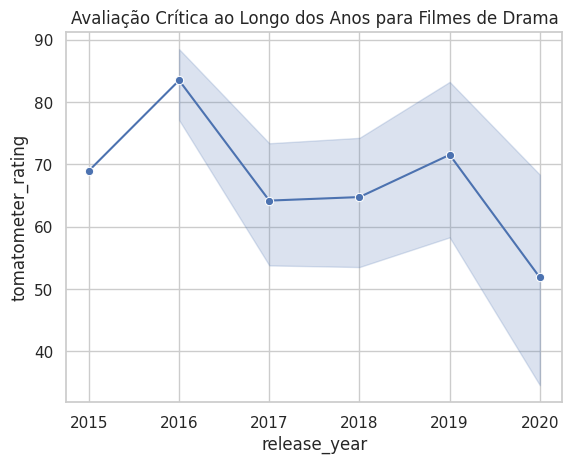

In [ ]:
# Verificar as colunas disponíveis no DataFrame
print(dramas_combinados.columns)

# Identificar a coluna correta de ano de lançamento
if 'release_year_x' not in dramas_combinados.columns:
    print("Coluna 'release_year_x' não encontrada. Verifique outras colunas relacionadas ao ano:")
    print([col for col in dramas_combinados.columns if 'release_year' in col])

# Supondo que a coluna correta seja 'release_year'
dramas_combinados['release_year'] = dramas_combinados['release_year'].astype(int)
sns.lineplot(x='release_year', y='tomatometer_rating', data=dramas_combinados, marker='o')
plt.title('Avaliação Crítica ao Longo dos Anos para Filmes de Drama')
plt.show()


### **Explicação**
O gráfico de linha mostra como as avaliações da crítica para os filmes de drama mudaram ao longo dos anos. Ele ajuda a identificar possíveis tendências ou padrões nas avaliações críticas com o passar do tempo.

---

## **Comparação das Avaliações do Público e da Crítica**

Vamos comparar diretamente as avaliações do público e da crítica para os filmes de drama utilizando um scatter plot.


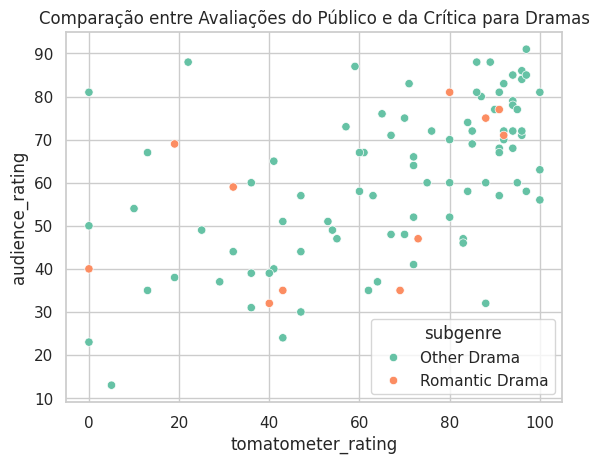

In [ ]:
# Scatter plot comparando avaliações do público e da crítica
sns.scatterplot(x='tomatometer_rating', y='audience_rating', data=dramas_combinados, hue='subgenre', palette='Set2')
plt.title('Comparação entre Avaliações do Público e da Crítica para Dramas')
plt.show()

# # Análise de correlação entre as avaliações
# correlacao_critica_publico = dramas_combinados[['tomatometer_rating', 'audience_rating']].corr()

# # Exibir a matriz de correlação
# print(correlacao_critica_publico)


### **Explicação**
O gráfico de dispersão nos permite visualizar as diferenças ou similaridades entre as avaliações do público e da crítica para os filmes de drama. A adição do **subgênero** como uma variável de cor nos permite identificar se diferentes subgêneros tendem a ter avaliações mais divergentes ou semelhantes entre crítica e público.

---

## **Outliers nas Avaliações Críticas**

Aqui, buscamos identificar outliers (valores fora do padrão) nas avaliações da crítica.

<ipython-input-82-d467ba7cb204>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='tomatometer_rating', data=dramas_combinados, palette='Set3')


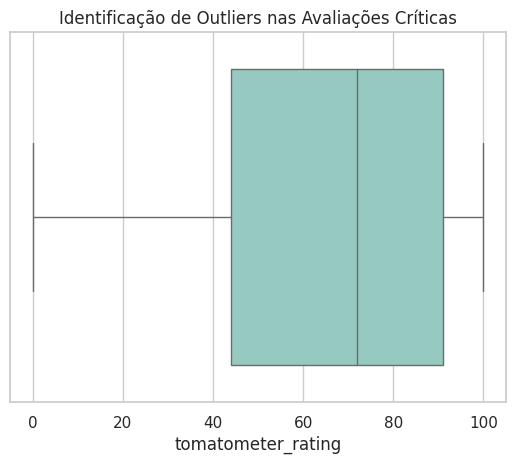

In [ ]:
# Boxplot para identificar outliers nas avaliações críticas
sns.boxplot(x='tomatometer_rating', data=dramas_combinados, palette='Set3')
plt.title('Identificação de Outliers nas Avaliações Críticas')
plt.show()


### **Explicação**
O **boxplot** é uma excelente ferramenta para identificar outliers, que são filmes que tiveram avaliações muito fora do comum (seja muito altas ou muito baixas). Esses outliers podem indicar filmes controversos ou que tiveram uma recepção atípica.

---

## **Distribuição das Avaliações ao Longo das Décadas**

Finalmente, visualizamos como as avaliações foram distribuídas ao longo das décadas.

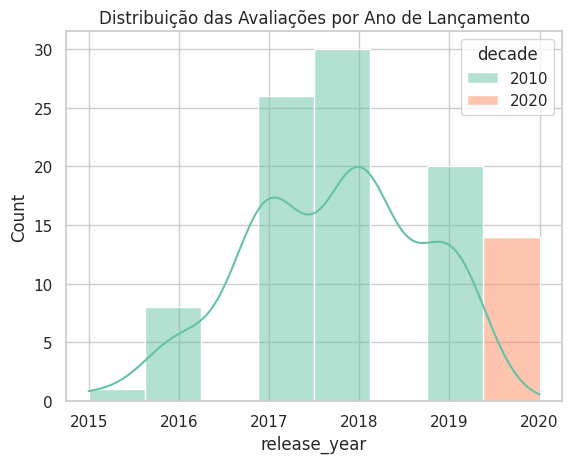

In [ ]:
# Criando uma coluna para a década
dramas_combinados['decade'] = (dramas_combinados['release_year'] // 10) * 10

# Histograma da distribuição das avaliações por década
sns.histplot(data=dramas_combinados, x='release_year', hue='decade', multiple='stack', kde=True, palette='Set2')
plt.title('Distribuição das Avaliações por Ano de Lançamento')
plt.show()


### **Explicação**
O **histograma** nos ajuda a ver a distribuição das avaliações críticas e de público ao longo das décadas, o que pode revelar como diferentes gerações de filmes foram recebidas pelos críticos e pelo público.

---

## **Gráfico de Barras para Distribuição de Filmes por Subgênero**
Esse gráfico vai mostrar quantos filmes de cada subgênero estão presentes no dataset de Dramas combinados, ajudando a entender a distribuição dos filmes por categorias.

<ipython-input-100-2da5d6f27a33>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='subgenre', data=dramas_combinados, palette='Set2')


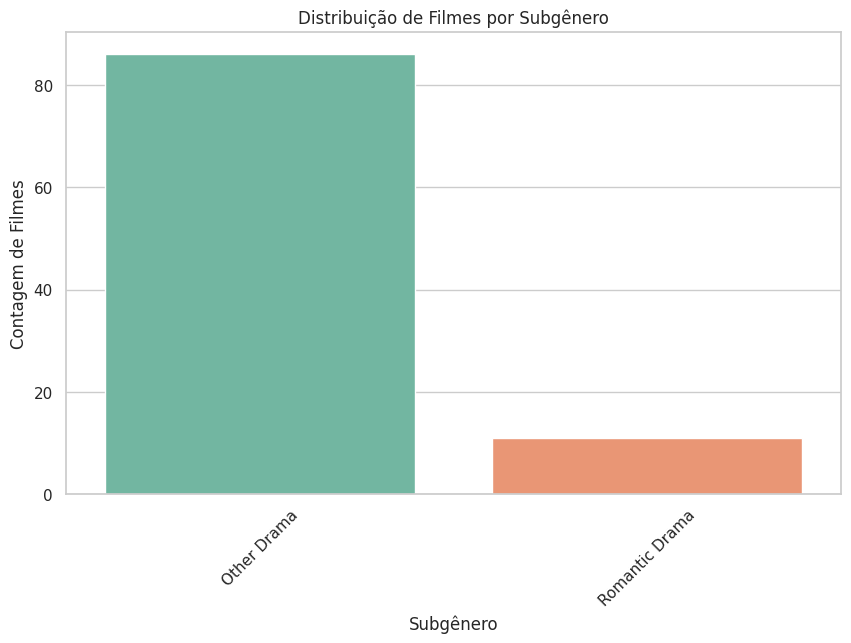

In [ ]:
# Gráfico de barras para a contagem de filmes por subgênero
plt.figure(figsize=(10, 6))
sns.countplot(x='subgenre', data=dramas_combinados, palette='Set2')
plt.title('Distribuição de Filmes por Subgênero')
plt.xlabel('Subgênero')
plt.ylabel('Contagem de Filmes')
plt.xticks(rotation=45)
plt.show()

### **Explicação**
Esse gráfico de barras vai ajudar a visualizar a quantidade de filmes em cada subgênero dentro do gênero **Drama**, como **Romantic Drama**, **Crime Drama**, e **Other Drama**. Isso pode fornecer insights sobre quais tipos de dramas estão mais presentes no dataset, além de auxiliar em análises mais direcionadas para cada subgênero.

---

## **Gráfico de Densidade para Avaliações Críticas e de Público**
Esse gráfico de densidade compara as distribuições das avaliações da crítica e do público. Ele ajuda a entender como essas avaliações estão espalhadas, mostrando a frequência com que certas notas aparecem.

<ipython-input-101-c7c8cb01c512>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dramas_combinados['tomatometer_rating'], shade=True, color='r', label='Avaliação Crítica')
<ipython-input-101-c7c8cb01c512>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dramas_combinados['audience_rating'], shade=True, color='b', label='Avaliação do Público')


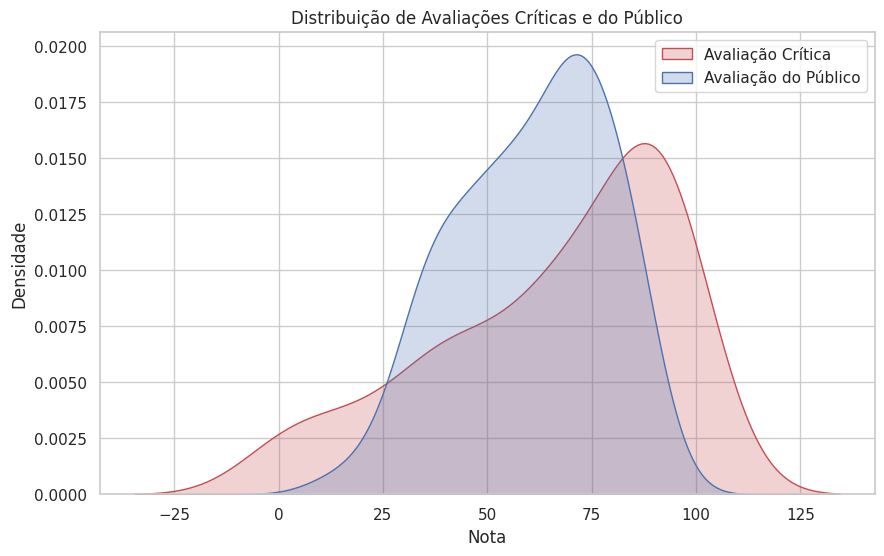

In [ ]:
# Gráfico de densidade para as avaliações críticas e de público
plt.figure(figsize=(10, 6))
sns.kdeplot(dramas_combinados['tomatometer_rating'], shade=True, color='r', label='Avaliação Crítica')
sns.kdeplot(dramas_combinados['audience_rating'], shade=True, color='b', label='Avaliação do Público')
plt.title('Distribuição de Avaliações Críticas e do Público')
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.legend()
plt.show()

### **Explicação**
O gráfico de densidade permite comparar visualmente como as avaliações da crítica e do público estão distribuídas. Ele mostra quais notas são mais frequentes para cada grupo. Se as curvas das duas avaliações estiverem distantes, isso indica uma disparidade significativa entre as avaliações da crítica e do público. Se estiverem próximas, significa que a percepção entre esses dois grupos é semelhante.

---

## **Gráfico de Violino para Comparação de Avaliações**
O gráfico de violino combina elementos de um **boxplot** e um **gráfico de densidade**, permitindo uma visualização rica das distribuições das avaliações, destacando tanto a mediana quanto a forma da distribuição.

<ipython-input-102-ef2d2fab47a4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='subgenre', y='tomatometer_rating', data=dramas_combinados, palette='Set3', inner='quartile')


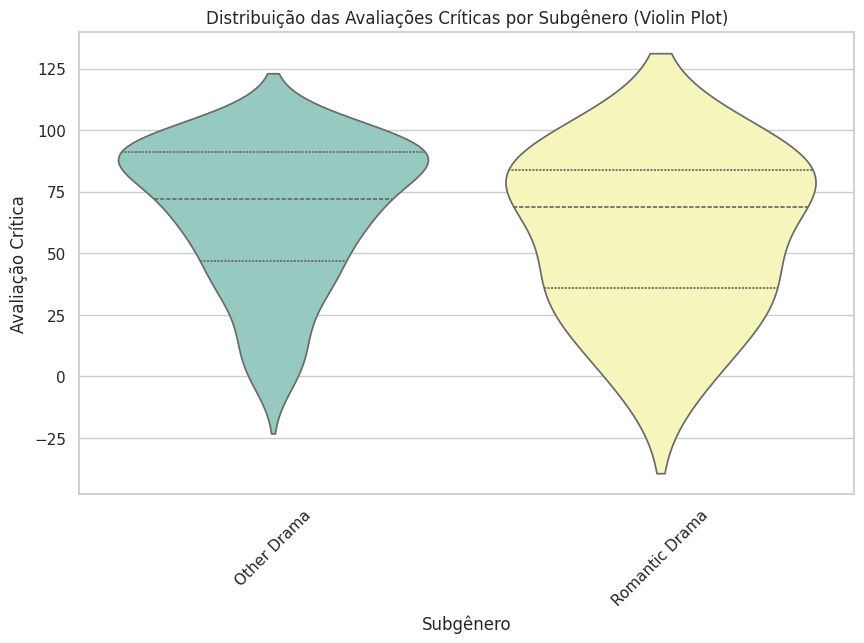

In [ ]:
# Gráfico de violino para comparar as avaliações do público e da crítica por subgênero
plt.figure(figsize=(10, 6))
sns.violinplot(x='subgenre', y='tomatometer_rating', data=dramas_combinados, palette='Set3', inner='quartile')
plt.title('Distribuição das Avaliações Críticas por Subgênero (Violin Plot)')
plt.xlabel('Subgênero')
plt.ylabel('Avaliação Crítica')
plt.xticks(rotation=45)
plt.show()

## **Explicação**
O **gráfico de violino** visualiza tanto a **distribuição das notas** quanto as **diferenças de densidade** para cada subgênero. Ele oferece uma visão mais detalhada do que um boxplot padrão, mostrando onde as avaliações estão mais concentradas e quão "espalhadas" elas estão. O interior do violino representa a **distribuição da densidade**, e o contorno mostra o intervalo das avaliações, permitindo comparar as diferenças entre os subgêneros de forma mais detalhada.

---

## **Gráfico de Rede (Network Graph) para Conexões entre Gêneros**
Um gráfico de rede visualiza as conexões e interações entre gêneros ou subgêneros. Ele pode mostrar como diferentes subgêneros se conectam através de filmes que compartilham características (por exemplo, "Drama" pode estar conectado a "Romance" e "Crime").

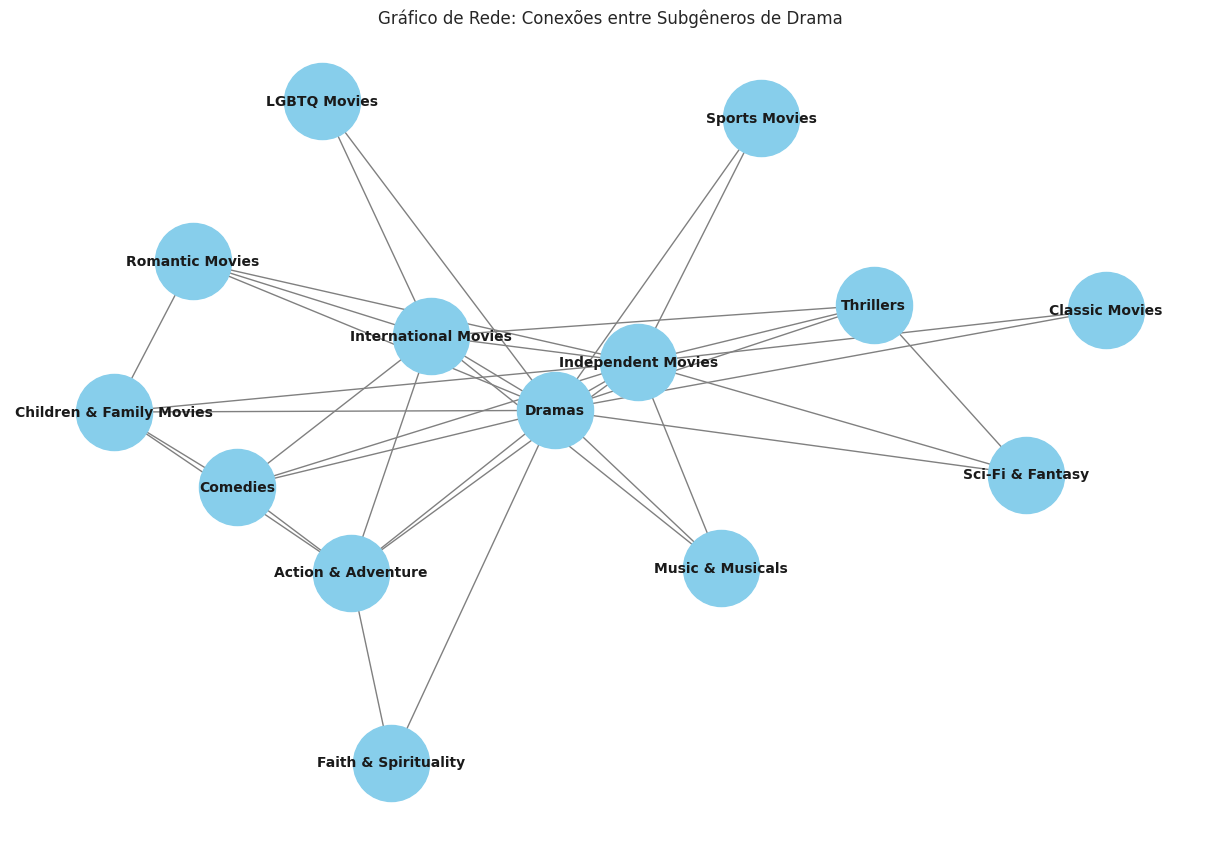

In [ ]:
import networkx as nx

# Criando uma lista de conexões entre subgêneros
conexoes_subgenero = []

for index, row in dramas_combinados.iterrows():
    subgeneros = row['listed_in'].split(',')
    for i in range(len(subgeneros)):
        for j in range(i+1, len(subgeneros)):
            conexoes_subgenero.append((subgeneros[i].strip(), subgeneros[j].strip()))

# Criando o gráfico de rede
G = nx.Graph()
G.add_edges_from(conexoes_subgenero)

# Desenhando o gráfico de rede
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
plt.title('Gráfico de Rede: Conexões entre Subgêneros de Drama')
plt.show()

### **Explicação**
O **gráfico de rede** visualiza as conexões entre diferentes subgêneros. Ele é útil para entender como os filmes se distribuem entre diferentes categorias e como subgêneros como **Romance**, **Crime**, **Drama** e outros podem estar inter-relacionados. Os **nós** representam os subgêneros, e as **arestas** mostram as conexões entre eles. Isso oferece uma visão interessante sobre como os filmes podem pertencer a vários gêneros ao mesmo tempo.

---

## **Conclusão**

Este projeto permitiu uma análise detalhada dos filmes do gênero **Drama** presentes na **Netflix** e suas respectivas avaliações no **Rotten Tomatoes**, explorando diversos aspectos como correlações, subgêneros e comparações entre as avaliações do público e da crítica.

Durante a análise, identificamos padrões importantes, como a relação entre a duração do filme e sua recepção, especialmente nas avaliações da crítica. Embora a correlação não seja extremamente forte, ela nos mostrou que filmes mais longos tendem a receber notas levemente superiores, possivelmente indicando um maior investimento em enredo e desenvolvimento de personagens.

Além disso, a análise de **subgêneros** como **Romantic Drama** e **Crime Drama** evidenciou diferenças significativas tanto nas avaliações críticas quanto nas avaliações do público, sugerindo que certos tipos de drama possuem apelo mais forte para públicos específicos.

Um ponto de destaque foi a tentativa de comparação entre filmes **premiados** e **não premiados**. Embora o dataset utilizado não contivesse filmes premiados suficientes para uma análise conclusiva, essa limitação realçou a importância de revisar os dados antes da aplicação de testes estatísticos. Em um contexto com mais filmes premiados, poderíamos esperar que prêmios como o **Oscar** influenciassem positivamente a percepção crítica, o que reforça o papel de prêmios em moldar a recepção de um filme.

As visualizações, especialmente o **gráfico de violino** e o **gráfico de rede**, trouxeram novas perspectivas à análise, ajudando a visualizar melhor as distribuições e conexões entre subgêneros. Esses gráficos, por serem menos comuns, oferecem uma maneira inovadora de olhar para os dados e entender relações que podem passar despercebidas em gráficos mais tradicionais.

Em resumo, este estudo forneceu insights valiosos sobre as avaliações de filmes de drama e destacou como diferentes fatores podem influenciar essas notas. As conclusões podem ser aplicadas tanto para os **produtores de conteúdo cinematográfico**, que podem ajustar seus filmes conforme as preferências de público e crítica, quanto para **pesquisadores**, interessados em explorar padrões de consumo de mídia em plataformas de streaming.

---